In [1]:
import pandas as pd
import arff
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data_freq
data_freq = arff.load("data/freMTPL2freq.arff")
df_freq = pd.DataFrame(
    data_freq,
    columns=[
        "IDpol",
        "ClaimNb",
        "Exposure",
        "Area",
        "VehPower",
        "VehAge",
        "DrivAge",
        "BonusMalus",
        "VehBrand",
        "VehGas",
        "Density",
        "Region",
    ],
)
# Load data_sev
data_sev = arff.load("data/freMTPL2sev.arff")
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

# Set IDpol as index
df_freq.set_index("IDpol", inplace=True)
df_sev.set_index("IDpol", inplace=True)

Printing the datasets in order to have a general understanding.

In [3]:
print(f"Total number of rows: {len(df_freq)}")
print(df_freq)

Total number of rows: 678013
           ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
IDpol                                                                      
1.0            1.0   0.10000  'D'       5.0     0.0     55.0        50.0   
3.0            1.0   0.77000  'D'       5.0     0.0     55.0        50.0   
5.0            1.0   0.75000  'B'       6.0     2.0     52.0        50.0   
10.0           1.0   0.09000  'B'       7.0     0.0     46.0        50.0   
11.0           1.0   0.84000  'B'       7.0     0.0     46.0        50.0   
...            ...       ...  ...       ...     ...      ...         ...   
6114326.0      0.0   0.00274  'E'       4.0     0.0     54.0        50.0   
6114327.0      0.0   0.00274  'E'       4.0     0.0     41.0        95.0   
6114328.0      0.0   0.00274  'D'       6.0     2.0     45.0        50.0   
6114329.0      0.0   0.00274  'B'       4.0     0.0     60.0        50.0   
6114330.0      0.0   0.00274  'B'       7.0     6.0     29.

In [4]:
print(f"Total number of rows: {len(df_sev)}")
print(df_sev)

Total number of rows: 26639
           ClaimAmount
IDpol                 
1552.0          995.20
1010996.0      1128.12
4024277.0      1851.11
4007252.0      1204.00
4046424.0      1204.00
...                ...
3254353.0      1200.00
3254353.0      1800.00
3254353.0      1000.00
2222064.0       767.55
2254065.0      1500.00

[26639 rows x 1 columns]


In [5]:
# Correct into the a string value
df_freq["Area"] = df_freq["Area"].apply(lambda x: x.strip("'\""))
df_freq["Region"] = df_freq["Region"].apply(lambda x: x.strip("'\""))
df_freq["VehBrand"] = df_freq["VehBrand"].apply(lambda x: x.strip("'\""))

# I want to convert the string values into integers for the model to be used later and to be plotted as histograms
# The arrays sArea and fArea are used to convert the string values into integers
sArea = np.array(
    [
        "A",
        "B",
        "C",
        "D",
        "E",
        "F",
        "G",
        "H",
        "I",
        "J",
        "K",
        "L",
        "M",
        "N",
        "O",
        "P",
        "Q",
    ]
)
fArea = np.arange(len(sArea))

# Convert the string values into integers via replace or lambda functions
df_freq["fArea"] = df_freq["Area"].replace(sArea, fArea)
df_freq["fRegion"] = df_freq["Region"].apply(lambda x: int(x.strip("R")))
df_freq["fVehBrand"] = df_freq["VehBrand"].apply(lambda x: int(x.strip("B")))
df_freq["fVehGas"] = df_freq["VehGas"].apply(lambda x: 1 if x == "Regular" else 0)

/tmp/ipykernel_22881/2232874245.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_freq["fArea"] = df_freq["Area"].replace(sArea, fArea)


In [6]:
# Check the conversion
print(f"Total number of rows: {len(df_freq)}")
print(df_freq)

Total number of rows: 678013
           ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
IDpol                                                                      
1.0            1.0   0.10000    D       5.0     0.0     55.0        50.0   
3.0            1.0   0.77000    D       5.0     0.0     55.0        50.0   
5.0            1.0   0.75000    B       6.0     2.0     52.0        50.0   
10.0           1.0   0.09000    B       7.0     0.0     46.0        50.0   
11.0           1.0   0.84000    B       7.0     0.0     46.0        50.0   
...            ...       ...  ...       ...     ...      ...         ...   
6114326.0      0.0   0.00274    E       4.0     0.0     54.0        50.0   
6114327.0      0.0   0.00274    E       4.0     0.0     41.0        95.0   
6114328.0      0.0   0.00274    D       6.0     2.0     45.0        50.0   
6114329.0      0.0   0.00274    B       4.0     0.0     60.0        50.0   
6114330.0      0.0   0.00274    B       7.0     6.0     29.

In [7]:
# Create a new dataframe with all info which we can use a modify as we need it
df = df_freq.copy()
# Create the ClaimAmount column and fill with nan values
df["ClaimAmount"] = np.nan
# Fill the ClaimAmount column with the values 0.0 where ClaimNb is 0.0
df.loc[df["ClaimNb"] == 0.0, "ClaimAmount"] = 0.0

# Check if all went smoothly
print(df)

           ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
IDpol                                                                      
1.0            1.0   0.10000    D       5.0     0.0     55.0        50.0   
3.0            1.0   0.77000    D       5.0     0.0     55.0        50.0   
5.0            1.0   0.75000    B       6.0     2.0     52.0        50.0   
10.0           1.0   0.09000    B       7.0     0.0     46.0        50.0   
11.0           1.0   0.84000    B       7.0     0.0     46.0        50.0   
...            ...       ...  ...       ...     ...      ...         ...   
6114326.0      0.0   0.00274    E       4.0     0.0     54.0        50.0   
6114327.0      0.0   0.00274    E       4.0     0.0     41.0        95.0   
6114328.0      0.0   0.00274    D       6.0     2.0     45.0        50.0   
6114329.0      0.0   0.00274    B       4.0     0.0     60.0        50.0   
6114330.0      0.0   0.00274    B       7.0     6.0     29.0        54.0   

          V

In [8]:
# For each IDpol in df_sev, update the ClaimAmount column in df
# If the IDpol is not in df, add it
# If the IDpol is in df but the number of claims is different, print a warning and skip it
# If the IDpol is in df and the number of claims is the same, update the ClaimAmount column with the sum of the ClaimAmount column in df_sev
# Note: this last step is subjective, it could be done differently

idPols = list(set(df_sev.index))
for idPol in idPols:
    if idPol not in df.index:
        print(f"IDpol {idPol} not found in df, adding it")
        df.loc[idPol] = np.nan
        df.loc[idPol, "ClaimNb"] = float(len(df_sev[df_sev.index == idPol].values))
    index = df.index == idPol
    values = df_sev[df_sev.index == idPol]["ClaimAmount"].values
    # I was using assert instead of if, but I want to skip the IDpol if the condition is not met because it is was causing the program to stop
    # assert len(values) == int(df.loc[index, "ClaimNb"].values[0])
    if len(values) != int(df.loc[index, "ClaimNb"].values[0]):
        print(
            f"IDpol {idPol} has {len(values)} claims but ClaimNb is {df.loc[index, 'ClaimNb'].values[0]}"
        )
        print("Skipping...")
        continue
    value = np.sum(values)
    df.loc[index, "ClaimAmount"] = value

IDpol 2262511.0 not found in df, adding it
IDpol 2277846.0 not found in df, adding it
IDpol 2282134.0 not found in df, adding it
IDpol 2286775.0 not found in df, adding it
IDpol 4158255.0 has 1 claims but ClaimNb is 2.0
Skipping...
IDpol 2220367.0 not found in df, adding it
IDpol 2227533.0 not found in df, adding it


In [9]:
# Add a column with the ratio of ClaimAmount and Exposure which will be needed later
df["ClaimAmount_Exposure"] = df["ClaimAmount"] / df["Exposure"]
df["Frequency"] = df["ClaimNb"] / df["Exposure"]

In [10]:
print(f"Total number of rows: {len(df)}")
print(df)

Total number of rows: 678019
           ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
IDpol                                                                      
1.0            1.0      0.10    D       5.0     0.0     55.0        50.0   
3.0            1.0      0.77    D       5.0     0.0     55.0        50.0   
5.0            1.0      0.75    B       6.0     2.0     52.0        50.0   
10.0           1.0      0.09    B       7.0     0.0     46.0        50.0   
11.0           1.0      0.84    B       7.0     0.0     46.0        50.0   
...            ...       ...  ...       ...     ...      ...         ...   
2277846.0     23.0       NaN  NaN       NaN     NaN      NaN         NaN   
2282134.0     36.0       NaN  NaN       NaN     NaN      NaN         NaN   
2286775.0     21.0       NaN  NaN       NaN     NaN      NaN         NaN   
2220367.0     24.0       NaN  NaN       NaN     NaN      NaN         NaN   
2227533.0     25.0       NaN  NaN       NaN     NaN      Na

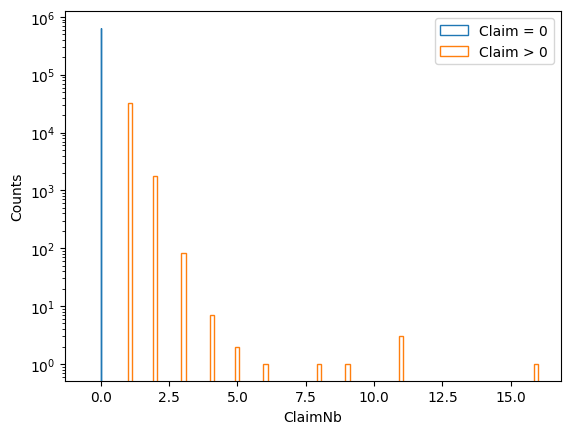

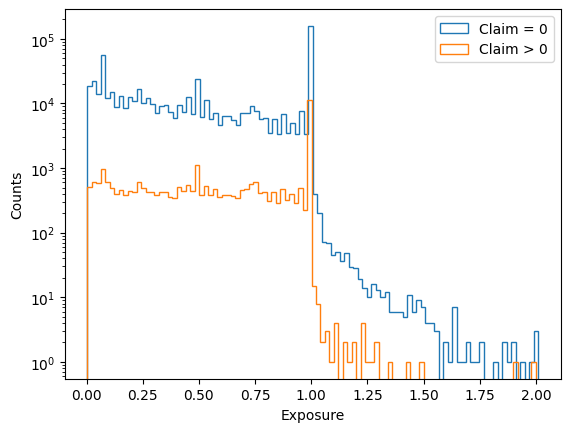

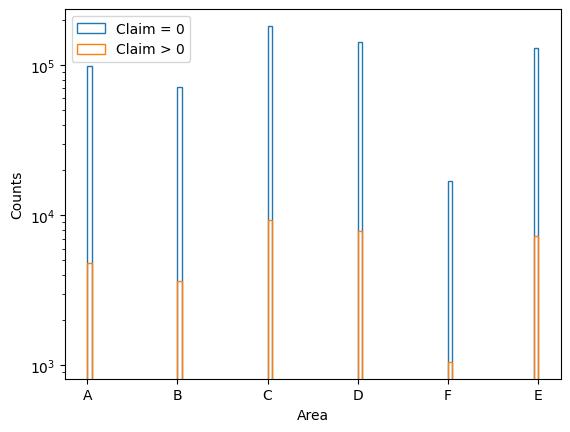

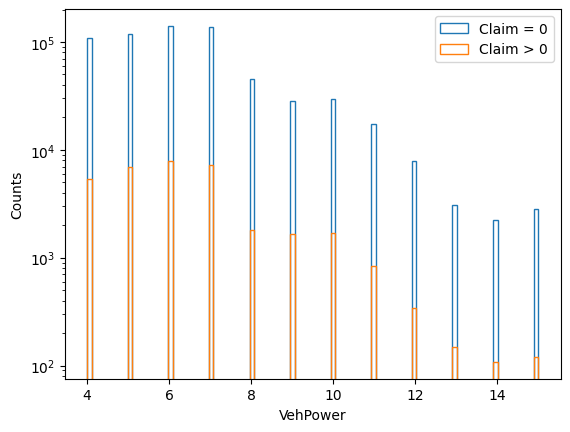

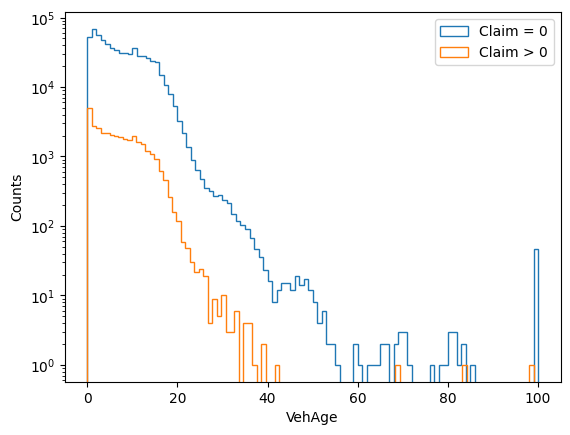

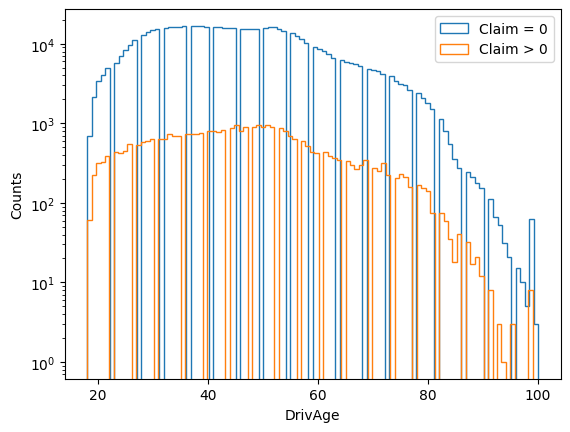

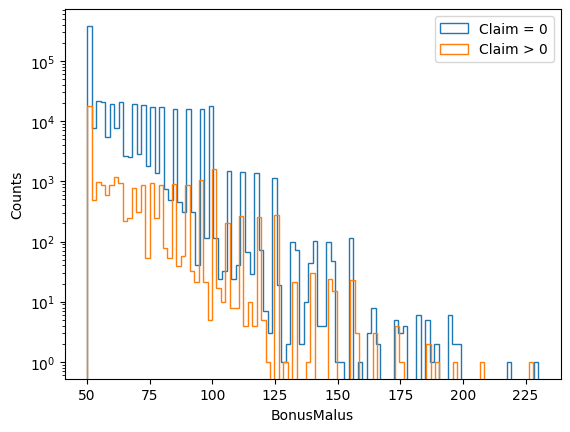

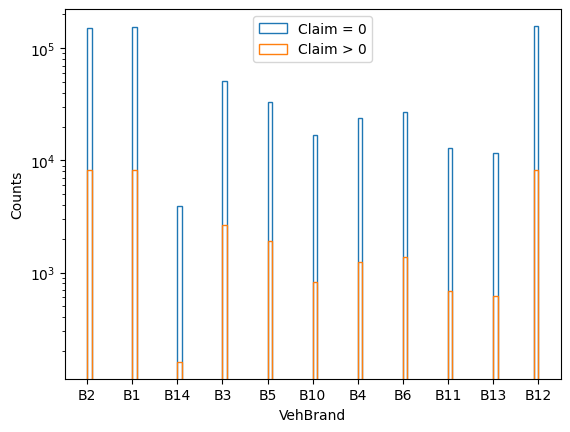

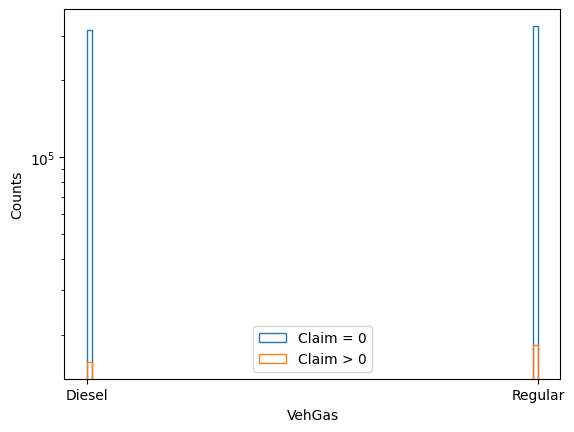

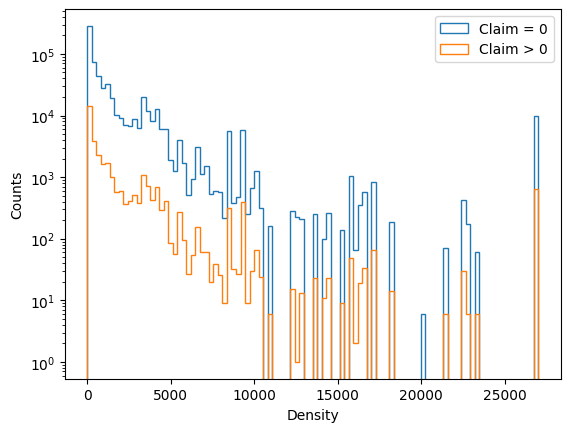

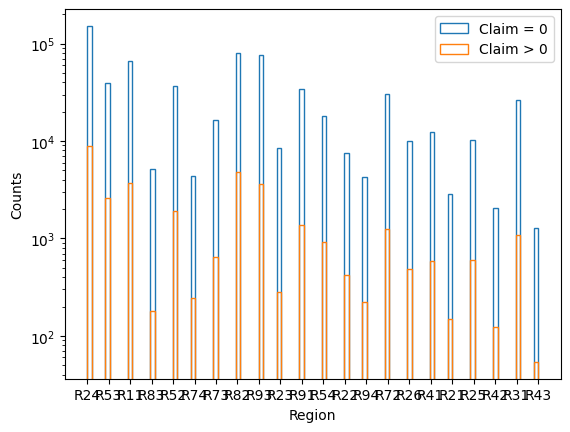

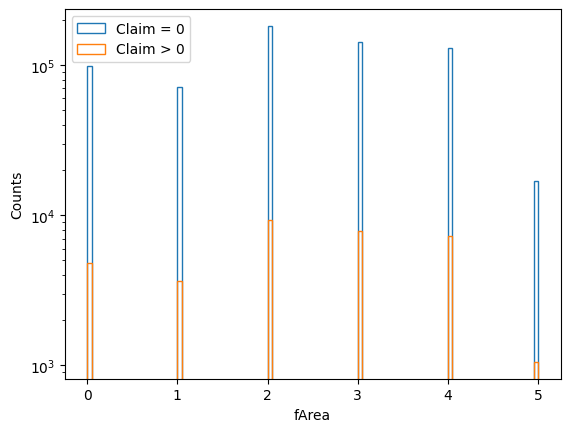

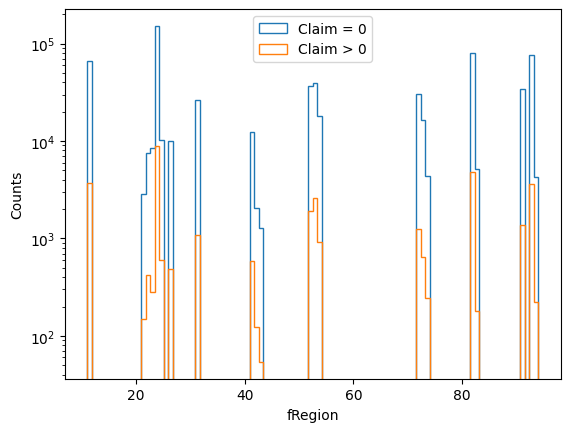

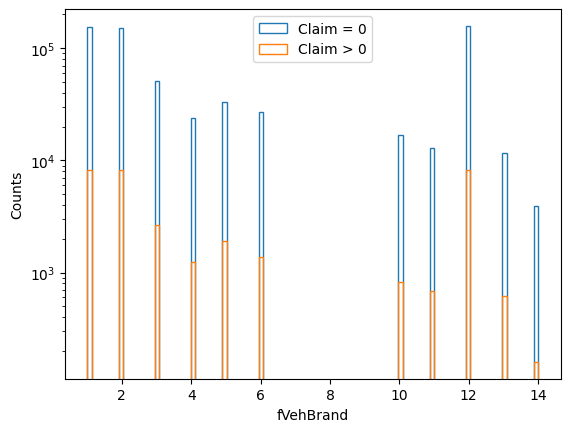

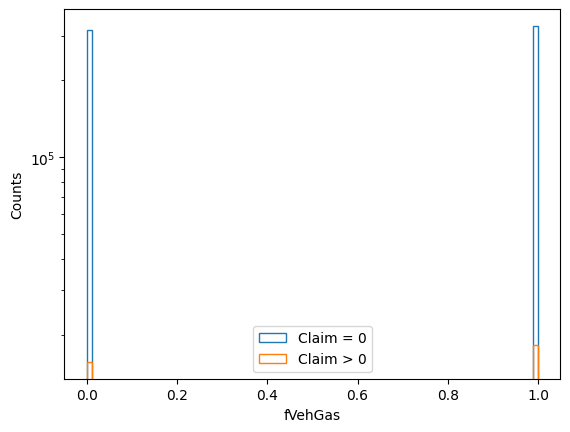

In [11]:
# Plot the averageCaimAmount as function of each variable
# This is done with a for loop. It is meant only for visualization purposes
# That is why bin is set to 100 and not optimized.

for column in df_freq.columns:
    if column in ["AverageClaimAmount", "IDpol", "ClaimAmount"]:
        continue
    plt.hist(
        df_freq[df_freq["ClaimNb"] == 0.0][column],
        bins=100,
        histtype="step",
        label="Claim = 0",
    )
    plt.hist(
        df_freq[(df_freq["ClaimNb"] != 0.0)][column],
        bins=100,
        histtype="step",
        label="Claim > 0",
    )
    plt.xlabel(column)
    plt.ylabel("Counts")
    plt.legend()
    plt.yscale("log")
    plt.show()

## Having a look at the ClaimAmount_Exposure distribution 

In [12]:
# From now on I will only use the df dataframe.
# Thus I make a copy of it to be able to go back to the original state if needed
df_original = df.copy()

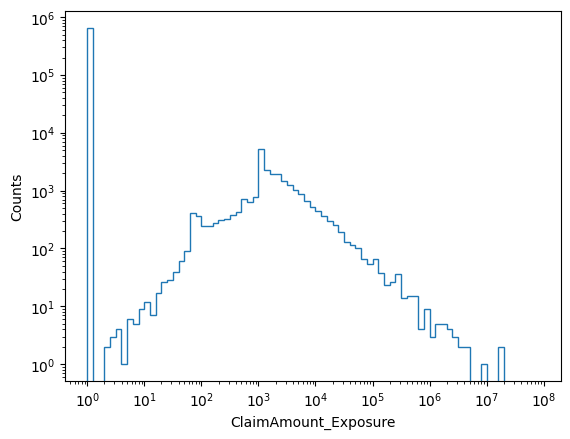

In [13]:
ClaimAmount_Exposure = df[df["ClaimAmount_Exposure"].isna() == False][
    "ClaimAmount_Exposure"
]

# Plot the averageCaimAmount as hist1d (+1 to avoid log(0))
plt.hist(ClaimAmount_Exposure + 1, bins=10 ** np.arange(0.0, 8.0, 0.1), histtype="step")
plt.xlabel("ClaimAmount_Exposure")
plt.ylabel("Counts")
plt.yscale("log")
plt.xscale("log")
plt.show()

*Comment*: It looks like it can be partially modeled via a gaussian fit. Let's see if it is possible...

In [14]:
from scipy.optimize import curve_fit

In [15]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma**2))

In [16]:
log10_ClaimAmount_Exposure = np.log10(ClaimAmount_Exposure).dropna()

hist, bin_edges = np.histogram(
    log10_ClaimAmount_Exposure, bins=np.arange(0.0, 8.0, 0.1)
)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
log10hist = np.log10(hist)

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_22881/4096569598.py:7: RuntimeWarning: divide by zero encountered in log10
  log10hist = np.log10(hist)


In [17]:
# Fit the histogram with a gaussian
# The mask is used to avoid the nan values
mask = np.isfinite(log10hist)
popt, pcov = curve_fit(gauss, bin_centres[mask], log10hist[mask], p0=[1, 1, 1])

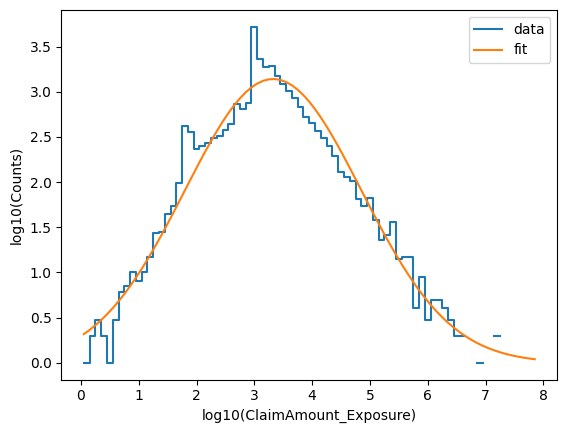

In [18]:
plt.step(bin_centres, log10hist, label="data")
plt.plot(bin_centres, gauss(bin_centres, *popt), label="fit")
plt.xlabel("log10(ClaimAmount_Exposure)")
plt.ylabel("log10(Counts)")
plt.legend()
plt.show()

*Note*: By modelling the ClaimAmount_Exposure as a gaussian distribution, we can use the mean and standard deviation to estimate the ClaimAmount_Exposure. 

This is useful because it may allow us to just require to model the number of claims and not the full amount.

For this, the ClaimAmount_Exposure should be indipendent from the number of claims and all the other variables.

Let's see if this is the case, via 2d histograms.

### 2D hist to understand the data distribution and correlation to ClaimAmount_Exposure

In [19]:
df_original = df.copy()

/tmp/ipykernel_22881/2144513341.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


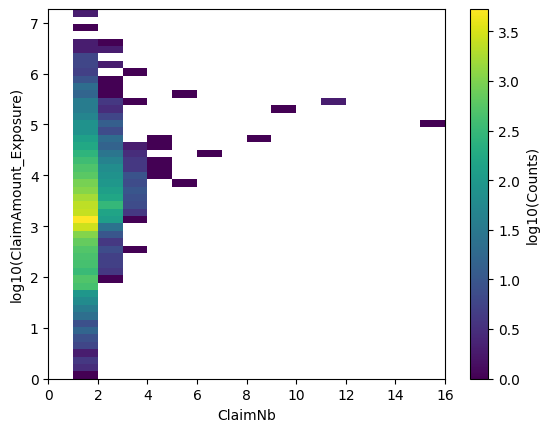

/tmp/ipykernel_22881/2144513341.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


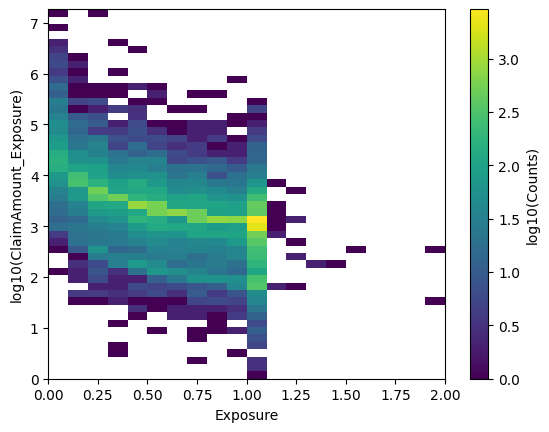

/tmp/ipykernel_22881/2144513341.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


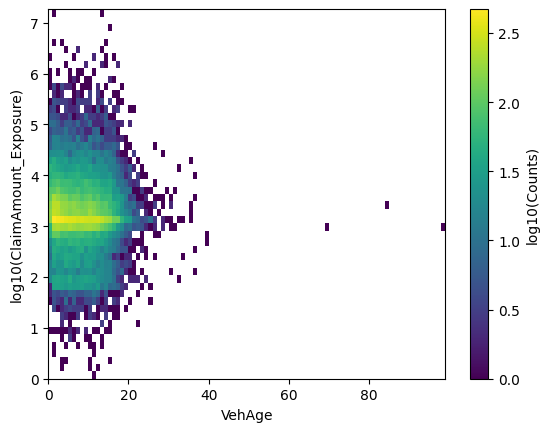

/tmp/ipykernel_22881/2144513341.py:46: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


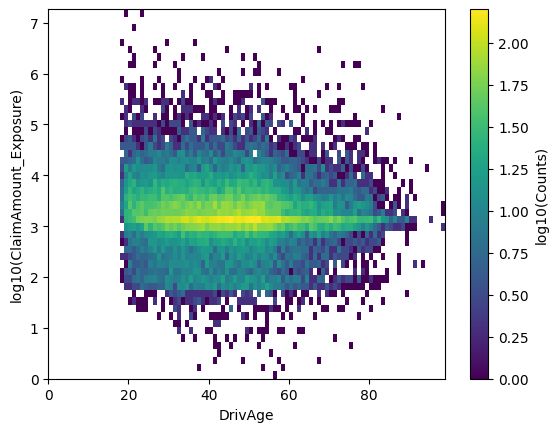

/tmp/ipykernel_22881/2144513341.py:58: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


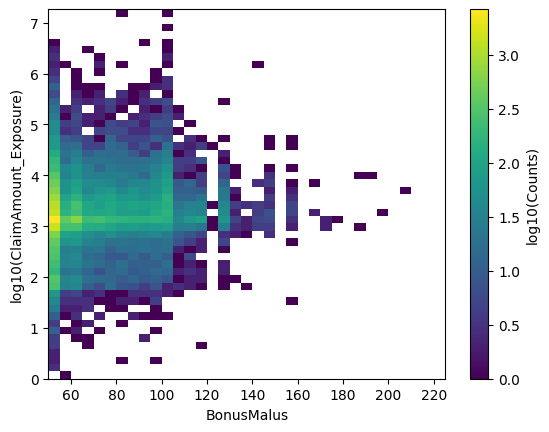

/tmp/ipykernel_22881/2144513341.py:70: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


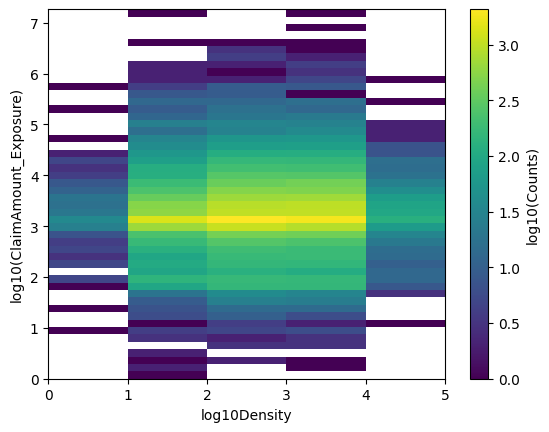

/tmp/ipykernel_22881/2144513341.py:82: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


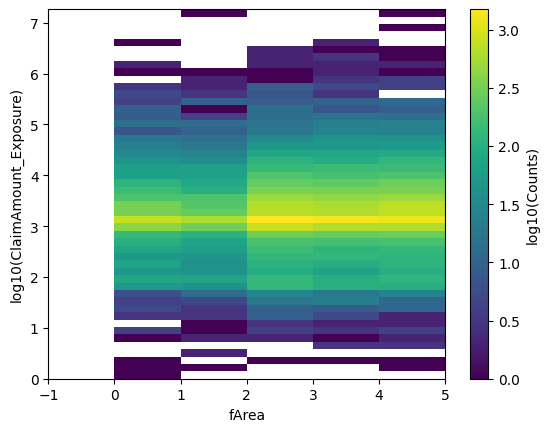

/tmp/ipykernel_22881/2144513341.py:94: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


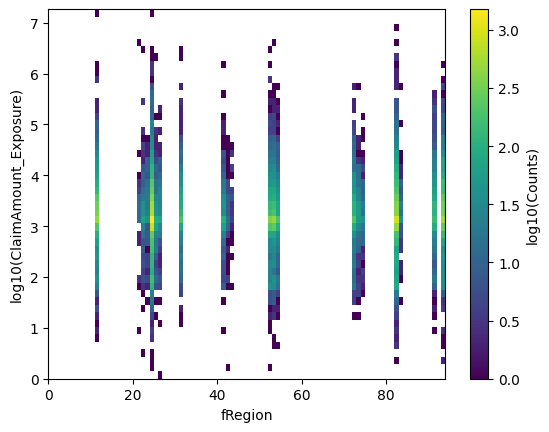

/tmp/ipykernel_22881/2144513341.py:106: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(x, y, np.log10(hist.T))


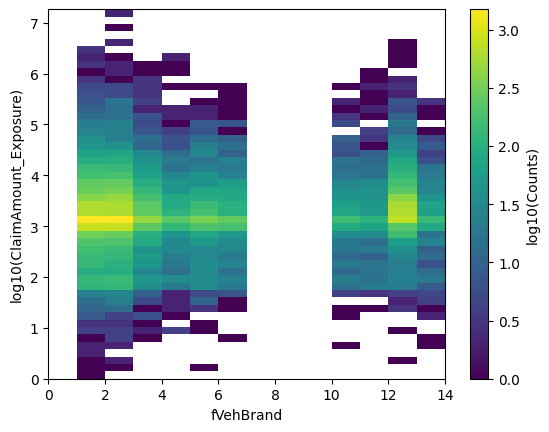

In [20]:
df = df[df["ClaimAmount_Exposure"].isna() == False]
df = df[df["ClaimAmount_Exposure"] > 0.0]

column = "ClaimNb"
bins_x = np.arange(0, max(df[column]) + 1, 1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "Exposure"
bins_x = np.arange(0, max(df[column]) + 0.1, 0.1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "VehAge"
bins_x = np.arange(0, max(df[column]) + 1, 1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "DrivAge"
bins_x = np.arange(0, max(df[column]) + 1, 1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "BonusMalus"
bins_x = np.arange(50, max(df[column]) + 1, 5)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "Density"
bins_x = np.arange(0, max(np.log10(df[column])) + 1, 1)
hist, x, y = np.histogram2d(
    np.log10(df[column]), np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(f"log10{column}")
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "fArea"
bins_x = np.arange(-1, max(df[column]) + 1, 1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "fRegion"
bins_x = np.arange(0, max(df[column]) + 1, 1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

column = "fVehBrand"
bins_x = np.arange(0, max(df[column]) + 1, 1)
hist, x, y = np.histogram2d(
    df[column], np.log10(df["ClaimAmount_Exposure"]), bins=[bins_x, 50]
)
hist = np.ma.masked_where(hist == 0, hist)
plt.pcolormesh(x, y, np.log10(hist.T))
plt.xlabel(column)
plt.ylabel("log10(ClaimAmount_Exposure)")
plt.colorbar(label="log10(Counts)")
plt.show()

*Note*: Some events are outliers, but they are not many. They could be removed, but for now I will keep them. E.g. Exposure > 1.00

*Comment*: The good news is that the variables seem to have a gaussian distribution. The bad news is that the variance is not constant and chenges dpending on the variables. 

However, this can be modeled via a gaussians fits. 

Let's see if we can see any correlation between the variables and the "probability" of having a claim.

### 1D histogram to understand the distribution of each feature and if it correlates to the CalimNb

In [21]:
df = df_original.copy()
df.dropna(inplace=True)
# Calculate the average claim probability to compare with the average claim probability of each variable
averageCalimProbability = df[df["ClaimNb"] > 0]["ClaimNb"].sum() / len(df) * 100

Note: The comment above about dropping the outliers is still valid.

In the some of the following plots, I take care of them by creating a large last bin. 

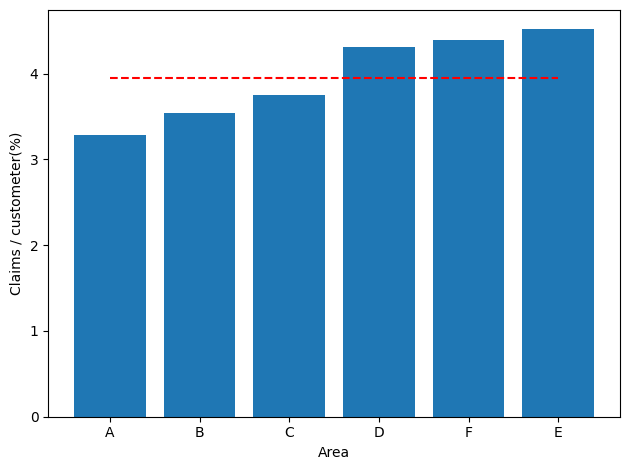

In [22]:
allKeys = list(set(df["Area"].values))
allKeys.sort()
probabilities = []
for key in allKeys:
    df_selected = df[(df["Area"] == key) & (df["ClaimNb"] > 0.0)]
    probability = np.sum(df_selected["ClaimNb"]) / len(df[(df["Area"] == key)]) * 100
    probabilities.append(probability)
# sort the probabilities and the corresponding keys
probabilities, allKeys = zip(*sorted(zip(probabilities, allKeys)))
plt.bar(allKeys, probabilities)
plt.plot(allKeys, [averageCalimProbability] * len(allKeys), "r--")
plt.xlabel("Area")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

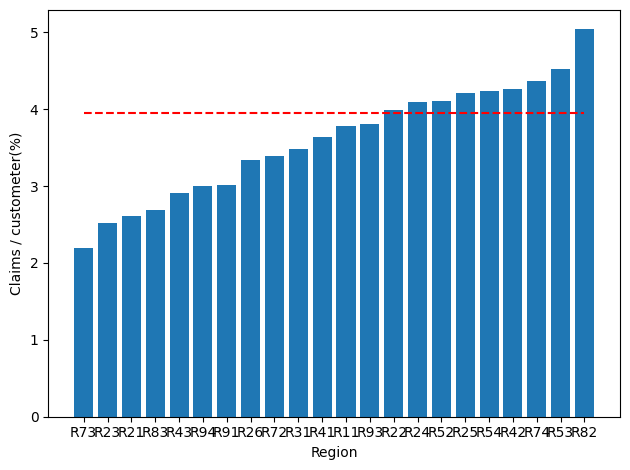

In [23]:
allKeys = list(set(df["Region"].values))
allKeys.sort()
probabilities = []
for key in allKeys:
    df_selected = df[(df["Region"] == key) & (df["ClaimNb"] > 0.0)]
    probability = np.sum(df_selected["ClaimNb"]) / len(df[(df["Region"] == key)]) * 100
    probabilities.append(probability)
# sort the probabilities and the corresponding keys
probabilities, allKeys = zip(*sorted(zip(probabilities, allKeys)))
plt.bar(allKeys, probabilities)
plt.plot(allKeys, [averageCalimProbability] * len(allKeys), "r--")
plt.xlabel("Region")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

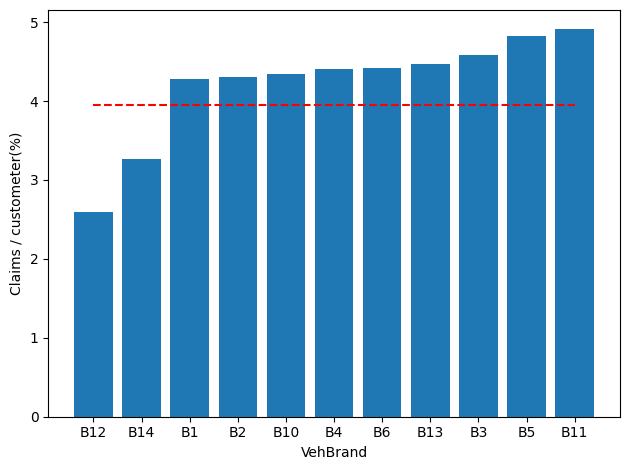

In [24]:
allKeys = list(set(df["VehBrand"].values))
allKeys.sort()
probabilities = []
for key in allKeys:
    df_selected = df[(df["VehBrand"] == key) & (df["ClaimNb"] > 0.0)]
    probability = (
        np.sum(df_selected["ClaimNb"]) / len(df[(df["VehBrand"] == key)]) * 100
    )
    probabilities.append(probability)
# sort the probabilities and the corresponding keys
probabilities, allKeys = zip(*sorted(zip(probabilities, allKeys)))
plt.bar(allKeys, probabilities)
plt.plot(allKeys, [averageCalimProbability] * len(allKeys), "r--")
plt.xlabel("VehBrand")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

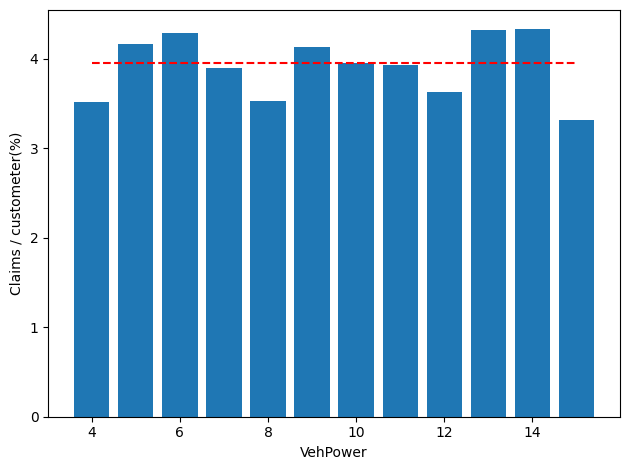

In [25]:
allKeys = list(set(df["VehPower"].values))
allKeys.sort()
probabilities = []
for key in allKeys:
    df_selected = df[(df["VehPower"] == key) & (df["ClaimNb"] > 0.0)]
    probability = (
        np.sum(df_selected["ClaimNb"]) / len(df[(df["VehPower"] == key)]) * 100
    )
    probabilities.append(probability)
plt.bar(allKeys, probabilities)
plt.plot(allKeys, [averageCalimProbability] * len(allKeys), "r--")
plt.xlabel("VehPower")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

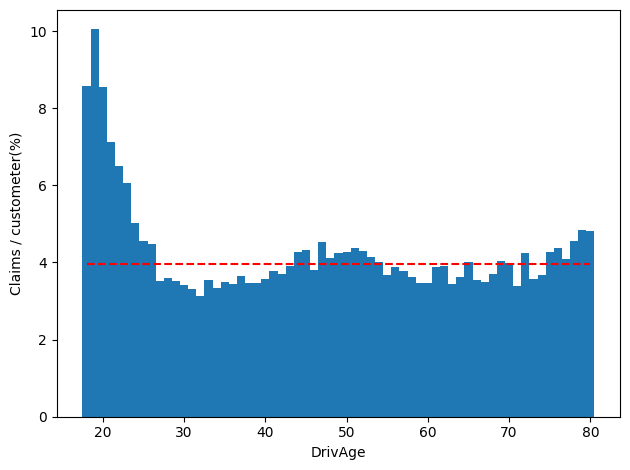

In [26]:
bins = np.arange(18, 80.5, 1)
bins = np.append(bins, 100)

probabilities = []
for i in range(len(bins) - 1):
    df_selected = df[
        (df["DrivAge"] >= bins[i])
        & (df["DrivAge"] < bins[i + 1])
        & (df["ClaimNb"] > 0.0)
    ]
    probability = (
        np.sum(df_selected["ClaimNb"])
        / len(df[(df["DrivAge"] >= bins[i]) & (df["DrivAge"] < bins[i + 1])])
        * 100
    )
    probabilities.append(probability)
plt.bar(bins[:-1], probabilities, width=1)
plt.plot(bins[:-1], [averageCalimProbability] * len(bins[:-1]), "r--")
plt.xlabel("DrivAge")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

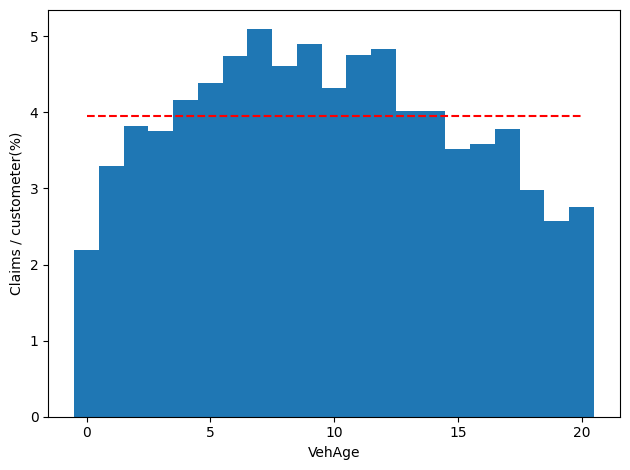

In [27]:
bins = np.arange(0, 20.5, 1)
bins = np.append(bins, 100)

probabilities = []
for i in range(len(bins) - 1):
    df_selected = df[
        (df["VehAge"] >= bins[i]) & (df["VehAge"] < bins[i + 1]) & (df["ClaimNb"] > 0.0)
    ]
    probability = (
        np.sum(df_selected["ClaimNb"])
        / len(df[(df["VehAge"] >= bins[i]) & (df["VehAge"] < bins[i + 1])])
        * 100
    )
    probabilities.append(probability)
plt.bar(bins[:-1], probabilities, width=1)
plt.plot(bins[:-1], [averageCalimProbability] * len(bins[:-1]), "r--")
plt.xlabel("VehAge")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

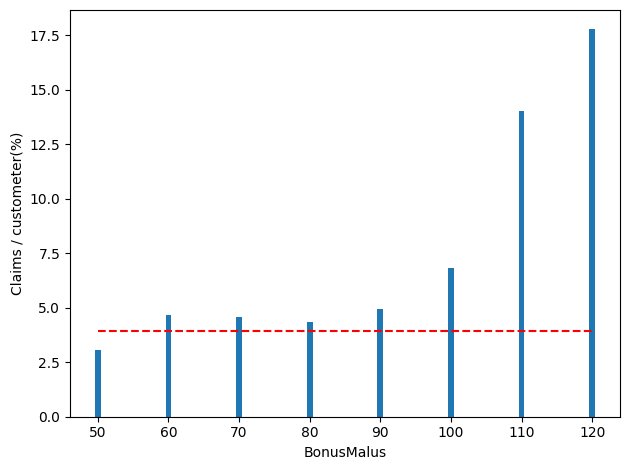

In [28]:
bins = np.arange(50, 121, 10)
bins = np.append(bins, 300)

probabilities = []
for i in range(len(bins) - 1):
    df_selected = df[
        (df["BonusMalus"] >= bins[i])
        & (df["BonusMalus"] < bins[i + 1])
        & (df["ClaimNb"] > 0.0)
    ]
    probability = (
        len(df_selected)
        / len(df[(df["BonusMalus"] >= bins[i]) & (df["BonusMalus"] < bins[i + 1])])
        * 100
    )
    probabilities.append(probability)
plt.bar(bins[:-1], probabilities)
plt.plot(bins[:-1], [averageCalimProbability] * len(bins[:-1]), "r--")
plt.xlabel("BonusMalus")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

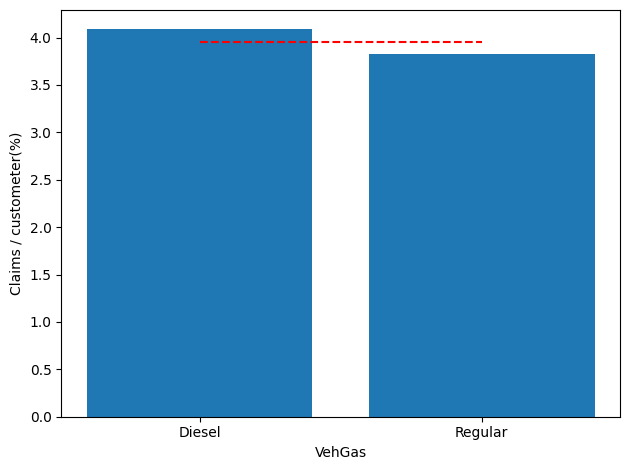

In [29]:
allKeys = list(set(df["VehGas"].values))
allKeys.sort()
probabilities = []

for key in allKeys:
    df_selected = df[(df["VehGas"] == key) & (df["ClaimNb"] > 0.0)]
    probability = np.sum(df_selected["ClaimNb"]) / len(df[(df["VehGas"] == key)]) * 100
    probabilities.append(probability)
plt.bar(allKeys, probabilities)
plt.plot(allKeys, [averageCalimProbability] * len(allKeys), "r--")
plt.xlabel("VehGas")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()
plt.show()

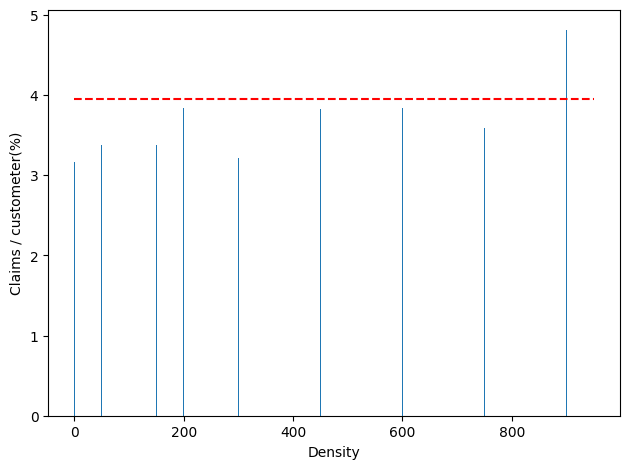

In [30]:
bins = np.arange(0, 1000, 50)
bins = np.append(bins, 10000)

probabilities = []

for i in range(len(bins) - 1):
    df_selected = df[
        (df["Density"] >= bins[i])
        & (df["Density"] < bins[i + 1])
        & (df["ClaimNb"] > 0.0)
    ]
    probability = (
        len(df_selected)
        / len(df[(df["Density"] >= bins[i]) & (df["Density"] < bins[i + 1])])
        * 100
    )
    probabilities.append(probability)
plt.bar(bins[:-1], probabilities)
plt.plot(bins[:-1], [averageCalimProbability] * len(bins[:-1]), "r--")
plt.xlabel("Density")
plt.ylabel("Claims / custometer(%)")
plt.tight_layout()

### We can now investicate some models to predict the ClaimAmount_Exposure and the ClaimNb

In [31]:
from statsmodels.api import families
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [32]:
df = df_original.copy()
df = df.dropna()

In [33]:
df

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,fArea,fRegion,fVehBrand,fVehGas,ClaimAmount,ClaimAmount_Exposure,Frequency
IDpol,,,,,,,,,,,,,,,,,,
139.0,1.0,0.75000,F,7.0,1.0,61.0,50.0,B12,Regular,27000.0,R11,5.0,11.0,12.0,1.0,303.00,404.000000,1.333333
190.0,1.0,0.14000,B,12.0,5.0,50.0,60.0,B12,Diesel,56.0,R25,1.0,25.0,12.0,0.0,1981.84,14156.000000,7.142857
414.0,1.0,0.14000,E,4.0,0.0,36.0,85.0,B12,Regular,4792.0,R11,4.0,11.0,12.0,1.0,1456.55,10403.928571,7.142857
424.0,2.0,0.62000,F,10.0,0.0,51.0,100.0,B12,Regular,27000.0,R11,5.0,11.0,12.0,1.0,10834.00,17474.193548,3.225806
463.0,1.0,0.31000,A,5.0,0.0,45.0,50.0,B12,Regular,12.0,R73,0.0,73.0,12.0,1.0,3986.67,12860.225806,3.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114326.0,0.0,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93,4.0,93.0,12.0,1.0,0.00,0.000000,0.000000
6114327.0,0.0,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11,4.0,11.0,12.0,1.0,0.00,0.000000,0.000000
6114328.0,0.0,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82,3.0,82.0,12.0,0.0,0.00,0.000000,0.000000


In [34]:
print(f"Total number of rows: {len(df)}")
print(f"Total NO Claims in the dataset: {len(df[df['ClaimNb'] == 0])}")
print(f"Total Claims in the dataset: {len(df[df['ClaimNb'] > 0])}")

Total number of rows: 668896
Total NO Claims in the dataset: 643953
Total Claims in the dataset: 24943


In [35]:
# Get the training and testing data split with 80% training and 20% testing (arbitrary)
train, test = train_test_split(df, test_size=0.2)

### Use poisson regression to predict the ClaimNb

The possoin distribution is a good fit for the data, cannot be used as the data is not a count data. 

But it can be used for the claim amount, only for those with the same Exposure. Otherwise the comparison is not fair.

Below implementation is for the claim number without taking into account the exposure time.
(This MUST be somehow taken into account and corrected. Maybe using weights(?))

In [36]:
# Area	VehPower	VehAge	DrivAge	BonusMalus	VehBrand	VehGas	Density	Region
model = smf.glm(
    formula="ClaimNb ~ DrivAge + BonusMalus + VehAge + fVehBrand + VehPower + fVehGas + fArea  + Density+ fRegion",
    data=train,
    family=families.Poisson(),
)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               535116
Model:                            GLM   Df Residuals:                   535106
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -88462.
Date:                Sun, 24 Nov 2024   Deviance:                   1.3644e+05
Time:                        20:29:14   Pearson chi2:                 5.88e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           0.006319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2272      0.052   -101.306      0.0

It looks to me a bit suspicious that the ClaimNb is correlated with all variables. Only exception being Density...

The correlation can be seen via the p-value < 0.05 or (P > |z|). 

Needs to be investigated further. Maybe indeed not taking the exposure into account is the problem.

/tmp/ipykernel_22881/4104348578.py:15: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))
/tmp/ipykernel_22881/4104348578.py:25: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))


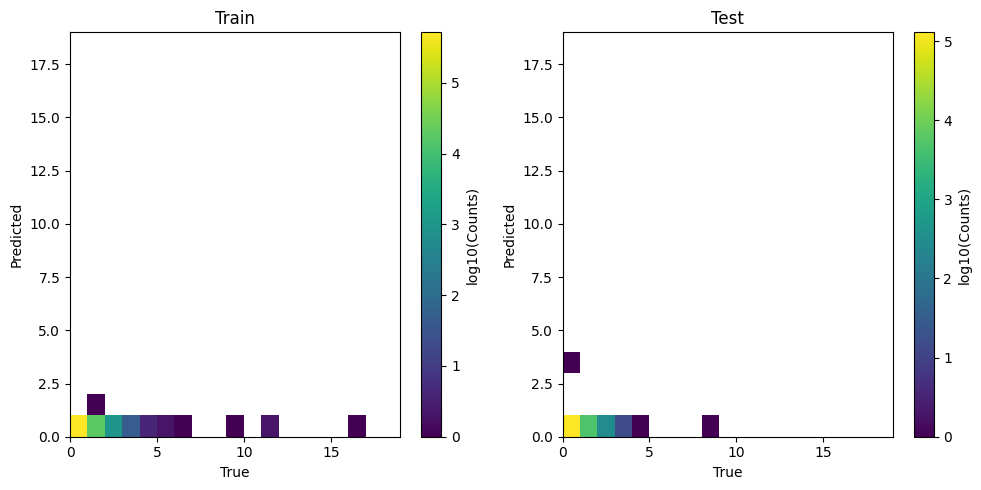

In [37]:
train_predictions = result.predict(train)
test_predictions = result.predict(test)

# This is some plotting for seeing how the model is doing in the training and testing data
# Ideally we should see a straight diagonal distribution

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

hist, x, y = np.histogram2d(
    train["ClaimNb"], train_predictions, bins=np.arange(0, 20, 1)
)
hist = np.ma.masked_where(hist == 0, hist)

ax = axs[0]
pc = ax.pcolormesh(x, y, np.log10(hist.T))
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_title("Train")
fig.colorbar(pc, label="log10(Counts)", ax=ax)

hist, x, y = np.histogram2d(test["ClaimNb"], test_predictions, bins=np.arange(0, 20, 1))
hist = np.ma.masked_where(hist == 0, hist)

ax = axs[1]
pc = ax.pcolormesh(x, y, np.log10(hist.T))
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_title("Test")
fig.colorbar(pc, label="log10(Counts)", ax=ax)

plt.tight_layout()
plt.show()

### ClaimAmount_Exposure with Linear distribution

Let's see if the number of claims can be modeled via a linear distribution. 

Using Ordinary Least Squares (OLS) we can see which variables are correlated.

And more importantly which variables are correlated to the number of claims.

The correlation can be seen via the p-value < 0.05 or (P > |z|). 

In [38]:
# Here we try just to predict just with the DrivAge and BonusMalus
X = train[["DrivAge", "BonusMalus"]]
y = train["ClaimAmount"] / train["Exposure"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.547
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00143
Time:                        20:29:14   Log-Likelihood:            -6.4443e+06
No. Observations:              535116   AIC:                         1.289e+07
Df Residuals:                  535113   BIC:                         1.289e+07
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -563.6421    260.807     -2.161      0.0

*Note*: heteroscedasticity robust standard errors type HC3 (optional) for taking into account different variances.

In [39]:
# Here we try to predict with all the variables from vehicle
X = train[["DrivAge", "BonusMalus", "VehAge", "fVehBrand", "VehPower"]]
y = train["ClaimAmount"] / train["Exposure"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.757
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           0.000239
Time:                        20:29:15   Log-Likelihood:            -6.4443e+06
No. Observations:              535116   AIC:                         1.289e+07
Df Residuals:                  535110   BIC:                         1.289e+07
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -670.4062    447.679     -1.498      0.1

In [40]:
# Here we try to predict with all the variables from area and regions
X = train[["DrivAge", "BonusMalus", "fArea", "Density", "fRegion"]]
y = train["ClaimAmount"] / train["Exposure"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.454
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00402
Time:                        20:29:15   Log-Likelihood:            -6.4443e+06
No. Observations:              535116   AIC:                         1.289e+07
Df Residuals:                  535110   BIC:                         1.289e+07
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -517.1792    267.551     -1.933      0.0

In [41]:
# Here we try to predict with all the variables
X = train[
    [
        "DrivAge",
        "BonusMalus",
        "VehAge",
        "fVehBrand",
        "VehPower",
        "fVehGas",
        "fArea",
        "Density",
        "fRegion",
    ]
]
y = train["ClaimAmount"] / train["Exposure"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.789
Date:                Sun, 24 Nov 2024   Prob (F-statistic):            0.00286
Time:                        20:29:15   Log-Likelihood:            -6.4443e+06
No. Observations:              535116   AIC:                         1.289e+07
Df Residuals:                  535106   BIC:                         1.289e+07
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -670.9863    426.959     -1.572      0.1

In [42]:
# How to get some test prediction of the model
X = test[
    [
        "DrivAge",
        "BonusMalus",
        "VehAge",
        "fVehBrand",
        "VehPower",
        "fVehGas",
        "fArea",
        "Density",
        "fRegion",
    ]
]
X = sm.add_constant(X)
test_predictions = model.predict(X)
# print(test_predictions)

### Fianl comments

Linear model looks like it is not a good fit for the data. Let's try a differnt model. R-squared: 0.000 regardless of the variables used.
Linear model is not a good fit for the data. (Kind of expected, since the model is not linear)

### Prediction of ClaimAmount_Exposure using Tweedie distribution

Let's see if the ClaimAmount_Exposure can be modeled via a Tweedie distribution.

From Wikipedia, the free encyclopedia

In probability and statistics, the Tweedie distributions are a family of probability distributions which include the purely continuous normal, gamma and inverse Gaussian distributions, the purely discrete scaled Poisson distribution, and the class of **compound Poisson–gamma distributions** which have positive mass at zero, but are otherwise continuous. Tweedie distributions are a special case of exponential dispersion models and are often used as distributions for generalized linear models.
The different function are modeled by the power (p):

extreme stable distribution, p < 0,

normal distribution, p = 0,

Poisson distribution, p = 1,

**compound Poisson–gamma distribution**, 1 < p < 2,

gamma distribution, p = 2,

positive stable distributions, 2 < p < 3,

Inverse Gaussian distribution, p = 3,

positive stable distributions, p > 3, and

extreme stable distributions, p = ∞.

For 0 < p < 1 no Tweedie model exists. Note that all stable distributions mean actually generated by stable distributions.

In [43]:
# Let's try to predict the ClaimAmount_Exposure with again a different combination of variables
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit()  # cov_type="HC3"
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535113
Model Family:                   Tweedie   Df Model:                            2
Link Function:                      Log   Scale:                      1.7431e+06
Method:                            IRLS   Log-Likelihood:                -815.26
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8419e+09
Time:                          20:29:17   Pearson chi2:                 9.33e+11
No. Iterations:                      14   Pseudo R-squ. (CS):          0.0001569
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2194      0.556

In [44]:
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus + VehAge + fVehBrand + VehPower ",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535110
Model Family:                   Tweedie   Df Model:                            5
Link Function:                      Log   Scale:                      1.5820e+06
Method:                            IRLS   Log-Likelihood:                -892.71
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8243e+09
Time:                          20:29:20   Pearson chi2:                 8.47e+11
No. Iterations:                      14   Pseudo R-squ. (CS):          0.0001937
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9424      0.604

In [45]:
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus + fArea  + Density+ fRegion",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535110
Model Family:                   Tweedie   Df Model:                            5
Link Function:                      Log   Scale:                      1.5125e+06
Method:                            IRLS   Log-Likelihood:                -935.53
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8297e+09
Time:                          20:29:22   Pearson chi2:                 8.09e+11
No. Iterations:                      15   Pseudo R-squ. (CS):          0.0001959
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2428      0.550

In [46]:
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus + VehAge + fVehBrand + VehPower + fVehGas + fArea  + Density+ fRegion",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535106
Model Family:                   Tweedie   Df Model:                            9
Link Function:                      Log   Scale:                      1.3781e+06
Method:                            IRLS   Log-Likelihood:                -1019.5
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8099e+09
Time:                          20:29:26   Pearson chi2:                 7.37e+11
No. Iterations:                      14   Pseudo R-squ. (CS):          0.0002418
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8847      0.593

In [47]:
# All variables
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus + VehAge + fVehBrand + VehPower + fVehGas + fArea  + Density+ fRegion",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit(cov_type="HC3")
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535106
Model Family:                   Tweedie   Df Model:                            9
Link Function:                      Log   Scale:                      1.3781e+06
Method:                            IRLS   Log-Likelihood:                -1019.5
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8099e+09
Time:                          20:29:30   Pearson chi2:                 7.37e+11
No. Iterations:                      14   Pseudo R-squ. (CS):          0.0002418
Covariance Type:                    HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8847      0.804

In [48]:
# Selecting only the variables that are significant
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus + fVehBrand + VehPower + fRegion",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535110
Model Family:                   Tweedie   Df Model:                            5
Link Function:                      Log   Scale:                      1.4870e+06
Method:                            IRLS   Log-Likelihood:                -948.64
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8210e+09
Time:                          20:29:32   Pearson chi2:                 7.96e+11
No. Iterations:                      14   Pseudo R-squ. (CS):          0.0002102
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1083      0.592

In [49]:
# Using only the variables that are significant
model = smf.glm(
    formula="ClaimAmount_Exposure ~ DrivAge + BonusMalus + fVehBrand",
    data=train,
    family=families.Tweedie(),
)
# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/bontempo/huk_coburg/.venv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in multiply
  endog * np.log(endog / mu) + (mu - endog))


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ClaimAmount_Exposure   No. Observations:               535116
Model:                              GLM   Df Residuals:                   535112
Model Family:                   Tweedie   Df Model:                            3
Link Function:                      Log   Scale:                      1.6432e+06
Method:                            IRLS   Log-Likelihood:                -861.24
Date:                  Sun, 24 Nov 2024   Deviance:                   2.8301e+09
Time:                          20:29:34   Pearson chi2:                 8.79e+11
No. Iterations:                      14   Pseudo R-squ. (CS):          0.0001799
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4196      0.542

In [50]:
train_predictions = result.predict(train)
test_predictions = result.predict(test)

In [51]:
# Plot the results
def plot_prediction(y_train, train_predictions, y_test, test_predictions):
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))

    hist, x, y = np.histogram2d(
        y_train + 1, train_predictions + 1, bins=10 ** np.arange(0, 6.0, 0.1)
    )
    hist = np.ma.masked_where(hist == 0, hist)

    ax = axs[0]
    pc = ax.pcolormesh(x, y, np.log10(hist.T))
    ax.plot(x, x, "r--")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title("Train")
    fig.colorbar(pc, label="log10(Counts)", ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_box_aspect(1)

    hist, x, y = np.histogram2d(
        y_test + 1, test_predictions + 1, bins=10 ** np.arange(0, 6.0, 0.1)
    )
    hist = np.ma.masked_where(hist == 0, hist)

    ax = axs[1]
    pc = ax.pcolormesh(x, y, np.log10(hist.T))
    ax.plot(x, x, "r--")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title("Test")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_box_aspect(1)
    fig.colorbar(pc, label="log10(Counts)", ax=ax)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_22881/3109186232.py:11: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))
/tmp/ipykernel_22881/3109186232.py:27: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))


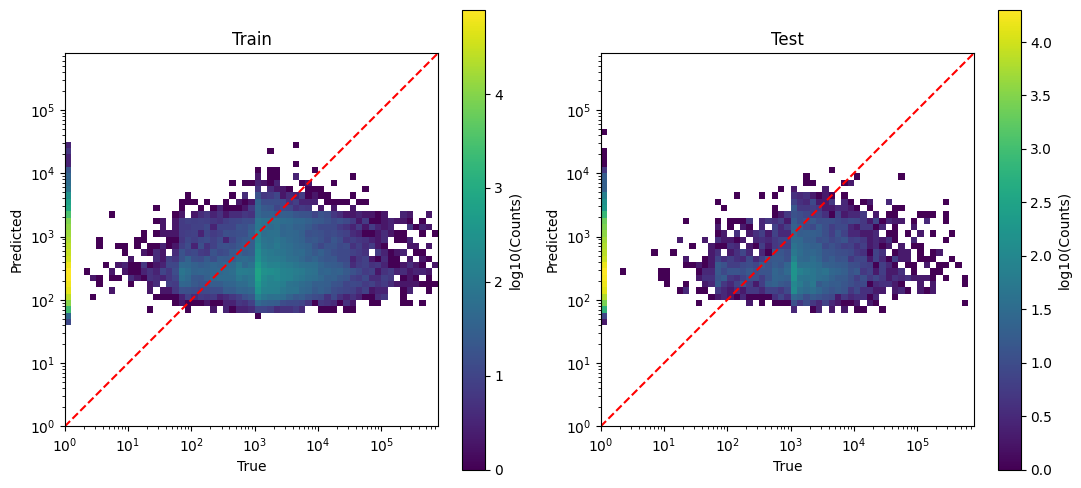

In [52]:
plot_prediction(
    train["ClaimAmount_Exposure"],
    train_predictions,
    test["ClaimAmount_Exposure"],
    test_predictions,
)

Final Note: The model predicts the values of the ClaimAmount_Exposure with a not good accuracy.

However, the model overpredicts the claim amount. This is a good thing as it means that the model is conservative.

Specifically, the vertical line which is supposed to be at 0, is above the diagonal line. This means that the model is conservative. In addition that is where the majority of the data is.

### Last try: Train a sklearn models 

In [53]:
from sklearn.linear_model import TweedieRegressor

In [54]:
x_train = train[["DrivAge", "BonusMalus", "fVehBrand", "VehPower", "fRegion"]]
y_train = train["ClaimAmount_Exposure"]

x_test = test[["DrivAge", "BonusMalus", "fVehBrand", "VehPower", "fRegion"]]
y_test = test["ClaimAmount_Exposure"]

I will simply try 2 models which have 2 extreem values in terms of power.

For future work, I would suggest to try more models and to try to optimize the hyperparameters.

In [55]:
# In this model I am not going to use any weights.
# I am not sure if we can use the exposure as a weight or maybe the number of claims but is something that could be investigated

twRegressor = TweedieRegressor(power=1.999, alpha=0.0, solver="newton-cholesky")
# The following lines are taken from the documentation:
# alpha = Constant that multiplies the L2 penalty term and determines the regularization strength. alpha = 0 is equivalent to unpenalized GLMs.
# solver{‘lbfgs’, ‘newton-cholesky’} # Algorithm to use in the optimization problem
# This solver is a good choice for n_samples >> n_features.
# The memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

fit_results = twRegressor.fit(x_train, y_train)

In [56]:
# Get the predictions
train_predictions = fit_results.predict(x_train)
test_predictions = fit_results.predict(x_test)

/tmp/ipykernel_22881/3109186232.py:11: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))
/tmp/ipykernel_22881/3109186232.py:27: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))


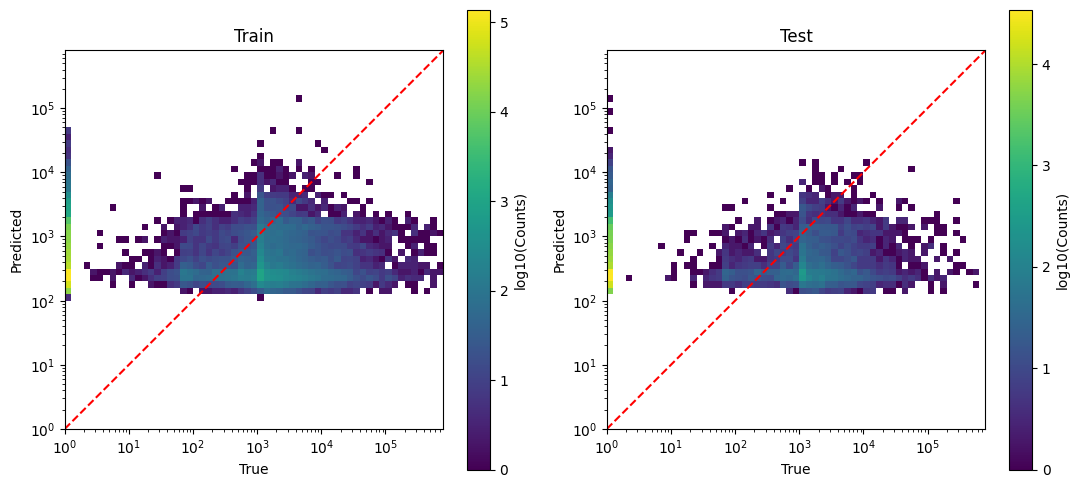

In [57]:
plot_prediction(y_train, train_predictions, y_test, test_predictions)

In [58]:
twRegressor = TweedieRegressor(power=1.0, alpha=0.0, solver="newton-cholesky")
fit_results = twRegressor.fit(x_train, y_train)

In [59]:
# Get the predictions
train_predictions = fit_results.predict(x_train)
test_predictions = fit_results.predict(x_test)

/tmp/ipykernel_22881/3109186232.py:11: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))
/tmp/ipykernel_22881/3109186232.py:27: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(x, y, np.log10(hist.T))


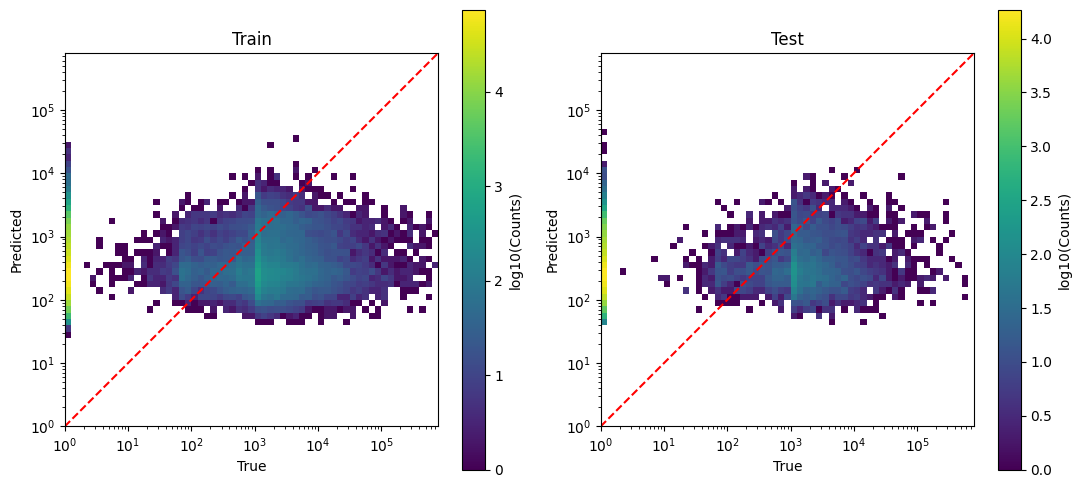

In [60]:
plot_prediction(y_train, train_predictions, y_test, test_predictions)

One last comment: It is clear that the power plays a big role in the prediction of the ClaimAmount_Exposure.

Specifically, the power closer to 2 tends to overpredict the ClaimAmount_Exposure. While the power closer to 1 tends to underpredict the ClaimAmount_Exposure.

### Conclusion

There have been mainly 2 attempts to model the data.

1. The first one was to model the ClaimAmount_Exposure via a gaussian distribution. And after estimate the number of claims in the amount of time. The poissoin fit did not fully convinced me.

2. The second one was to model the ClaimAmount_Exposure via a Tweedie distribution. The model was conservative and overpredicted the ClaimAmount_Exposure. This is a good thing as it means that the model is conservative.

In the end, the premium could be calculaded taking into account the predicted ClaimAmount_Exposure, a margin of safety and the risk of the company.

This could be modeled via a toy montecarlo simulation. And can be used for both checking the models and estimating the premium.

The first attempt I would try would be a linear model. Even though it is not a good fit for the data, it is a good starting point to understand if it is overestimating or underestimating the premium. Regardless, the Margin of Safety and the Risk of the Company are parameters that should be free and be adjusted.
